# downloading Data

In [1]:
#!git clone https://github.com/imadegunawinangun/TA-Gugun

In [2]:
!git clone https://github.com/imadegunawinangun/final-track

fatal: destination path 'final-track' already exists and is not an empty directory.


In [3]:
!ls final-track/final

track1	track2


# Import Library



In [4]:
import os
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import keras
from keras.models import Sequential
from keras.optimizers import Adam
from keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten, Dense
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
from imgaug import augmenters as iaa
import cv2
import pandas as pd
import ntpath
import random
!pip3 install imgaug
import tensorflow as tf


# Rename Pathfile

In [5]:
columns = ['center', 'left', 'right', 'steering', 'throttle', 'reverse', 'speed']

In [6]:
datadir1 = 'final-track/final/track1'
data1 = pd.read_csv(os.path.join(datadir1, 'driving_log.csv'), names = columns)
pd.set_option('display.max_colwidth', -1)
data1.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: FutureWarning: Passing a negative integer is deprecated in version 1.0 and will not be supported in future version. Instead, use None to not limit the column width.
  This is separate from the ipykernel package so we can avoid doing imports until


center  ...     speed
0  C:\Users\2E64AEB8448F\Desktop\final\track1\IMG\center_2021_07_20_19_46_02_347.jpg  ...  10.70280
1  C:\Users\2E64AEB8448F\Desktop\final\track1\IMG\center_2021_07_20_19_46_02_415.jpg  ...  11.35815
2  C:\Users\2E64AEB8448F\Desktop\final\track1\IMG\center_2021_07_20_19_46_02_482.jpg  ...  12.10183
3  C:\Users\2E64AEB8448F\Desktop\final\track1\IMG\center_2021_07_20_19_46_02_551.jpg  ...  12.93047
4  C:\Users\2E64AEB8448F\Desktop\final\track1\IMG\center_2021_07_20_19_46_02_618.jpg  ...  13.34923

[5 rows x 7 columns]

In [7]:
datadir2 = 'final-track/final/track2'
data2 = pd.read_csv(os.path.join(datadir2, 'driving_log.csv'), names = columns)
pd.set_option('display.max_colwidth', -1)
data2.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: FutureWarning: Passing a negative integer is deprecated in version 1.0 and will not be supported in future version. Instead, use None to not limit the column width.
  This is separate from the ipykernel package so we can avoid doing imports until


center  ...     speed
0  C:\Users\2E64AEB8448F\Desktop\final\track2\IMG\center_2021_07_20_20_08_24_044.jpg  ...  21.76823
1  C:\Users\2E64AEB8448F\Desktop\final\track2\IMG\center_2021_07_20_20_08_24_112.jpg  ...  22.57266
2  C:\Users\2E64AEB8448F\Desktop\final\track2\IMG\center_2021_07_20_20_08_24_179.jpg  ...  23.18514
3  C:\Users\2E64AEB8448F\Desktop\final\track2\IMG\center_2021_07_20_20_08_24_247.jpg  ...  23.75984
4  C:\Users\2E64AEB8448F\Desktop\final\track2\IMG\center_2021_07_20_20_08_24_315.jpg  ...  24.53874

[5 rows x 7 columns]

In [8]:
def path_leaf(path):
  head, tail = ntpath.split(path)
  return tail

In [9]:
data1['center'] = data1['center'].apply(path_leaf)
data1['left'] = data1['left'].apply(path_leaf)
data1['right'] = data1['right'].apply(path_leaf)
data1.head()

center  ...     speed
0  center_2021_07_20_19_46_02_347.jpg  ...  10.70280
1  center_2021_07_20_19_46_02_415.jpg  ...  11.35815
2  center_2021_07_20_19_46_02_482.jpg  ...  12.10183
3  center_2021_07_20_19_46_02_551.jpg  ...  12.93047
4  center_2021_07_20_19_46_02_618.jpg  ...  13.34923

[5 rows x 7 columns]

In [10]:
data2['center'] = data2['center'].apply(path_leaf)
data2['left'] = data2['left'].apply(path_leaf)
data2['right'] = data2['right'].apply(path_leaf)
data2.head()

center  ...     speed
0  center_2021_07_20_20_08_24_044.jpg  ...  21.76823
1  center_2021_07_20_20_08_24_112.jpg  ...  22.57266
2  center_2021_07_20_20_08_24_179.jpg  ...  23.18514
3  center_2021_07_20_20_08_24_247.jpg  ...  23.75984
4  center_2021_07_20_20_08_24_315.jpg  ...  24.53874

[5 rows x 7 columns]

# Data Visualisation

[-0.96 -0.88 -0.8  -0.72 -0.64 -0.56 -0.48 -0.4  -0.32 -0.24 -0.16 -0.08
  0.    0.08  0.16  0.24  0.32  0.4   0.48  0.56  0.64  0.72  0.8   0.88
  0.96]


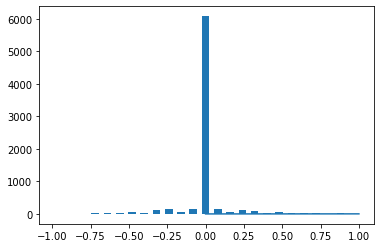

In [11]:
num_bins1 = 25
hist1, bins1 = np.histogram(data1['steering'], num_bins1)
center1 = (bins1[:-1]+ bins1[1:]) * 0.5
plt.bar(center1, hist1, width=0.05)
plt.plot((np.min(data1['steering']), np.max(data1['steering'])))
print(center1)


[-0.96 -0.88 -0.8  -0.72 -0.64 -0.56 -0.48 -0.4  -0.32 -0.24 -0.16 -0.08
  0.    0.08  0.16  0.24  0.32  0.4   0.48  0.56  0.64  0.72  0.8   0.88
  0.96]


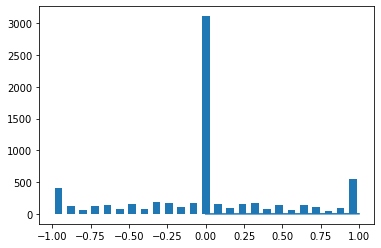

In [12]:
num_bins2 = 25
hist2, bins2 = np.histogram(data2['steering'], num_bins2)
center2 = (bins2[:-1]+ bins2[1:]) * 0.5
plt.bar(center2, hist2, width=0.05)
plt.plot((np.min(data2['steering']), np.max(data2['steering'])))
print(center2)

# Data Balancing

In [13]:
def data_balancing(data, num_bins, samples_per_bin, center, bins ):
  print('total data:', len(data))
  remove_list = []
  for j in range(num_bins):
    list_ = []
    for i in range(len(data['steering'])):
      if data['steering'][i] >= bins[j] and data['steering'][i] <= bins[j+1]:
        #data['steering'][i] = center[j]
        list_.append(i)

    list_ = shuffle(list_)
    list_ = list_[samples_per_bin:]
    remove_list.extend(list_)
  print('removed:', len(remove_list))
  data_=data.copy()
  data_.drop(data_.index[remove_list], inplace=True)
  print('remaining:', len(data_))
  return data_

total data: 7367
removed: 5677
remaining: 1690


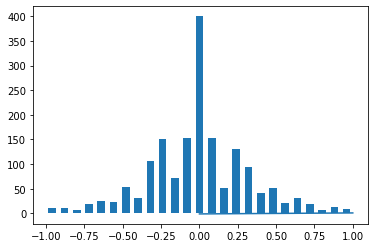

In [14]:
df1 = data_balancing(data1, num_bins1, 400, center1, bins1)
hist, _ = np.histogram(df1['steering'], (num_bins1))
plt.bar(center1, hist, width=0.05)
plt.plot((np.min(df1['steering']), np.max(df1['steering'])))

total data: 6677
removed: 1612
remaining: 5065


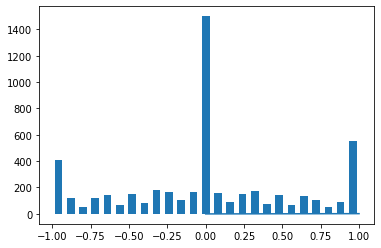

In [15]:
df2 = data_balancing(data2, num_bins2, 1500, center2, bins2)
hist, _ = np.histogram(df2['steering'], (num_bins1))
plt.bar(center1, hist, width=0.05)
plt.plot((np.min(df2['steering']), np.max(df2['steering'])))

# Merge Data1 and Data2

total data: 6755


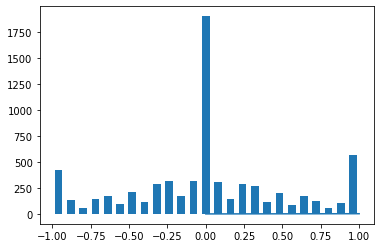

In [16]:
df = pd.concat([df1, df2], ignore_index=True, sort=False)
#df = df1
hist, _ = np.histogram(df['steering'], (num_bins1))
plt.bar(center1, hist, width=0.05)
plt.plot((np.min(df['steering']), np.max(df['steering'])))
print('total data:', len(df))


# Load Image + Steering


In [17]:
df.iloc[0]

center      center_2021_07_20_19_46_02_415.jpg
left        left_2021_07_20_19_46_02_415.jpg  
right       right_2021_07_20_19_46_02_415.jpg 
steering   -0.15                              
throttle    1                                 
reverse     0                                 
speed       11.3582                           
Name: 0, dtype: object

In [18]:
def load_img_steering(datadir, df):
  image_path = []
  steering = []
  for i in range(len(df)):
    indexed_data = df.iloc[i]
    center, left, right = indexed_data[0], indexed_data[1], indexed_data[2]
    image_path.append(os.path.join(datadir, center.strip()))
    steering.append(float(indexed_data[3]))
    # left image append
    image_path.append(os.path.join(datadir,left.strip()))
    steering.append(float(indexed_data[3])+0.2)
    # right image append
    image_path.append(os.path.join(datadir,right.strip()))
    steering.append(float(indexed_data[3])-0.2)
  image_paths = np.asarray(image_path)
  steerings = np.asarray(steering)
  return image_paths, steerings
 

In [19]:
image_paths1, steerings1 = load_img_steering(datadir1 + '/IMG', df1)


In [20]:
image_paths2, steerings2 = load_img_steering(datadir2 + '/IMG', df2)


In [21]:
image_paths = np.append(image_paths1,image_paths2)
steerings = np.append(steerings1,steerings2)
#image_paths = image_paths1
#steerings = steerings1
print(image_paths.shape)

(20265,)


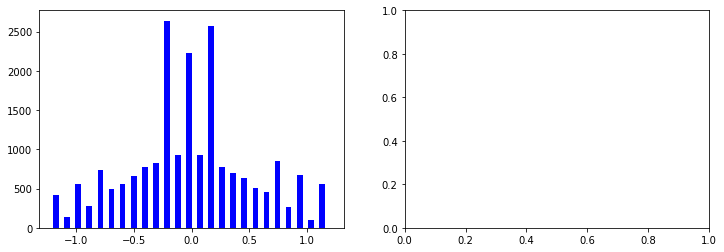

In [22]:
fig, axes = plt.subplots(1, 2, figsize=(12, 4))
axes[0].hist(steerings, bins=num_bins1, width=0.05, color='blue');

# Training & Validation Split

Training Samples: 15198
Valid Samples: 5067


Text(0.5, 1.0, 'Validation set')

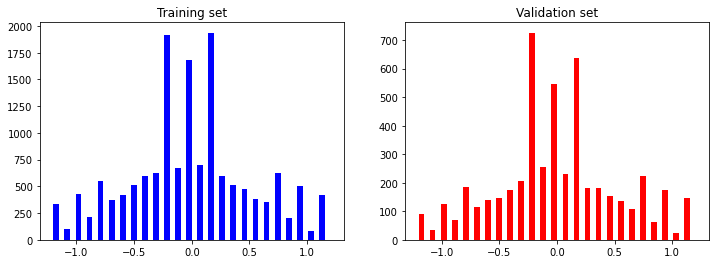

In [23]:
X_train, X_valid, y_train, y_valid = train_test_split(image_paths, steerings,test_size=0.25,random_state=2)
print('Training Samples: {}\nValid Samples: {}'.format(len(X_train), len(X_valid)))
fig, axes = plt.subplots(1, 2, figsize=(12, 4))
axes[0].hist(y_train, bins=num_bins1, width=0.05, color='blue')
axes[0].set_title('Training set')
axes[1].hist(y_valid, bins=num_bins1, width=0.05, color='red')
axes[1].set_title('Validation set')

# Augmentation

In [24]:
def zoom(image):
  zoom = iaa.Affine(scale=(1, 1.3))
  image = zoom.augment_image(image)
  return image
def pan(image):
  pan = iaa.Affine(translate_percent= {"x" : (-0.1, 0.1), "y": (-0.1, 0.1)})
  image = pan.augment_image(image)
  return image
def img_random_brightness(image):
    brightness = iaa.Multiply((0.2, 1))
    image = brightness.augment_image(image)
    return image
def img_random_flip(image, steering_angle):
    image = cv2.flip(image,1)
    steering_angle = -steering_angle
    return image, steering_angle
def random_shadow(img):
    ht, wd , ch = img.shape
    x1, y1 = wd * np.random.rand(), 0
    x2, y2 = wd * np.random.rand(), ht
    xm, ym = np.mgrid[0:ht, 0:wd]
    
    mask = np.zeros_like(img[:, :, 1])
    mask[(ym - y1) * (x2 - x1) - (y2 - y1) * (xm - x1) > 0] = 1

    cond = mask == np.random.randint(2)
    s_ratio = np.random.uniform(low=0.6, high=0.9)
    
    hls = cv2.cvtColor(img, cv2.COLOR_RGB2HLS)
    hls[:, :, 1][cond] = hls[:, :, 1][cond] * s_ratio
    image = cv2.cvtColor(hls, cv2.COLOR_HLS2RGB)
    return image

Text(0.5, 1.0, 'Shadowed Image')

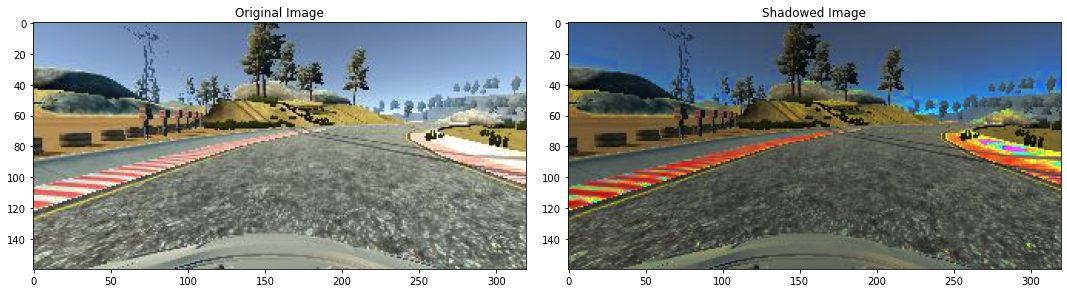

In [25]:
image = image_paths[random.randint(0, len(X_train))]
original_image = mpimg.imread(image)
shadow_image = random_shadow(original_image)
 
fig, axs = plt.subplots(1, 2, figsize=(15, 10))
fig.tight_layout()
 
axs[0].imshow(original_image)
axs[0].set_title('Original Image')
 
axs[1].imshow(shadow_image)
axs[1].set_title('Shadowed Image')

Text(0.5, 1.0, 'Zoomed Image - Steering Angle:0.8')

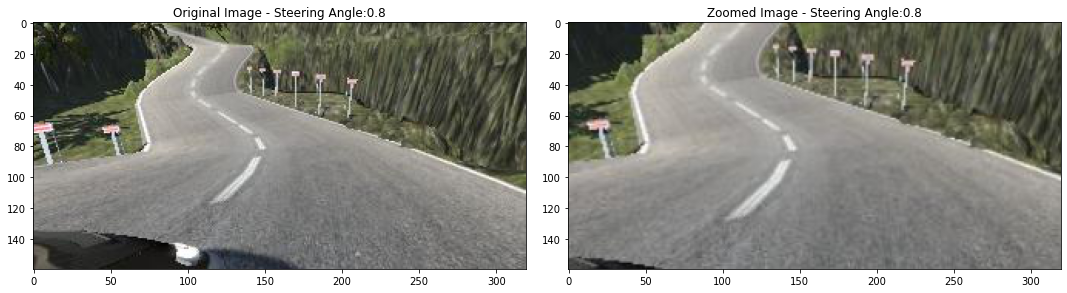

In [26]:
random_index = random.randint(0, len(df)-1)
image = image_paths[random_index]
steering_angle = steerings[random_index]
original_image = mpimg.imread(image)
zoomed_image = zoom(original_image)
 
fig, axs = plt.subplots(1, 2, figsize=(15, 10))
fig.tight_layout()
 
axs[0].imshow(original_image)
axs[0].set_title('Original Image - ' + 'Steering Angle:' + str(steering_angle))
 
axs[1].imshow(zoomed_image)
axs[1].set_title('Zoomed Image - ' + 'Steering Angle:' + str(steering_angle))

Text(0.5, 1.0, 'Panned Image - Steering Angle:0.0')

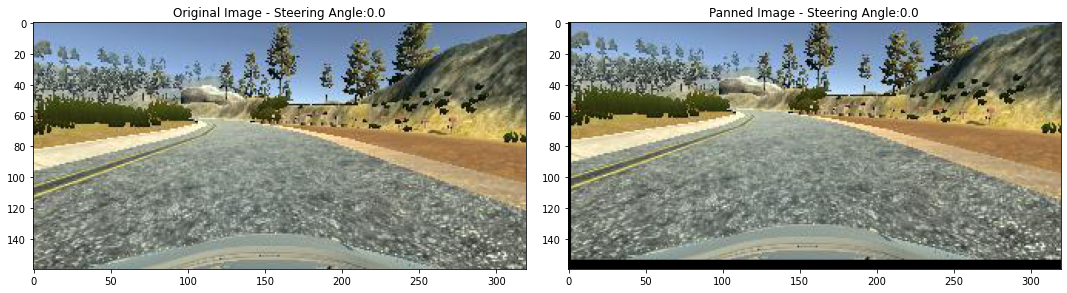

In [27]:
random_index = random.randint(0, len(df)-1)
image = image_paths[random_index]
steering_angle = steerings[random_index]
original_image = mpimg.imread(image)
panned_image = pan(original_image)
 
fig, axs = plt.subplots(1, 2, figsize=(15, 10))
fig.tight_layout()
 
axs[0].imshow(original_image)
axs[0].set_title('Original Image - ' + 'Steering Angle:' + str(steering_angle))
 
axs[1].imshow(panned_image)
axs[1].set_title('Panned Image - ' + 'Steering Angle:' + str(steering_angle))

Text(0.5, 1.0, 'Brightness altered Image - Steering Angle:-0.2')

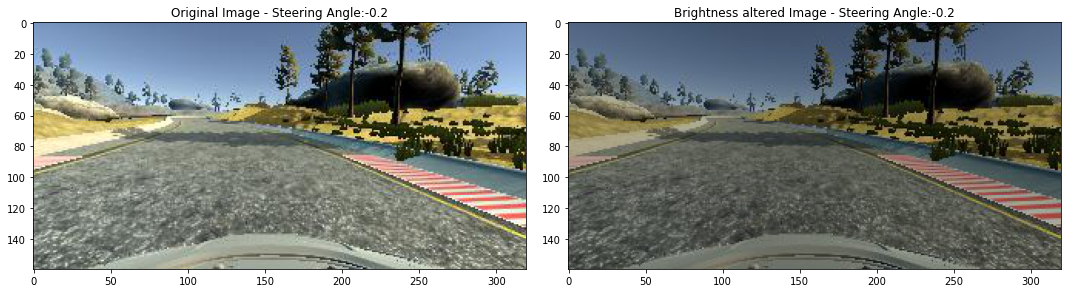

In [28]:
random_index = random.randint(0, len(df)-1)
image = image_paths[random_index]
steering_angle = steerings[random_index]
original_image = mpimg.imread(image)
brightness_altered_image = img_random_brightness(original_image)
steering_angle = steerings[random_index]
 
fig, axs = plt.subplots(1, 2, figsize=(15, 10))
fig.tight_layout()
 
axs[0].imshow(original_image)
axs[0].set_title('Original Image - ' + 'Steering Angle:' + str(steering_angle))
 
axs[1].imshow(brightness_altered_image)
axs[1].set_title('Brightness altered Image - ' + 'Steering Angle:' + str(steering_angle))

Text(0.5, 1.0, 'Flipped Image - Steering Angle:1.2')

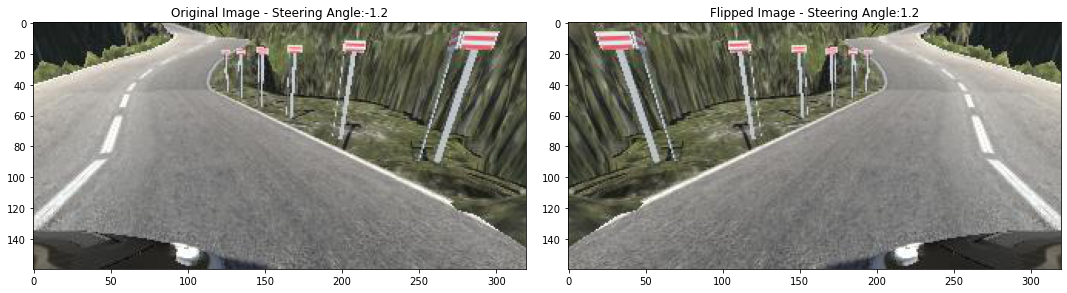

In [29]:
random_index = random.randint(0, len(df)-1)
image = image_paths[random_index]
steering_angle = steerings[random_index]
 
 
original_image = mpimg.imread(image)
flipped_image, flipped_steering_angle = img_random_flip(original_image, steering_angle)
 
fig, axs = plt.subplots(1, 2, figsize=(15, 10))
fig.tight_layout()
 
axs[0].imshow(original_image)
axs[0].set_title('Original Image - ' + 'Steering Angle:' + str(steering_angle))
 
axs[1].imshow(flipped_image)
axs[1].set_title('Flipped Image - ' + 'Steering Angle:' + str(flipped_steering_angle))

In [30]:
def random_augment(image, steering_angle):
    image = mpimg.imread(image)
    if np.random.rand() < 0.5:
      image = pan(image)
    if np.random.rand() < 0.5:
      image = zoom(image)
    if np.random.rand() < 0.5:
      image = img_random_brightness(image)
    if np.random.rand() < 0.5:
      image, steering_angle = img_random_flip(image, steering_angle)
    if np.random.rand() < 0.5:
      image = random_shadow(image)
    
    return image, steering_angle

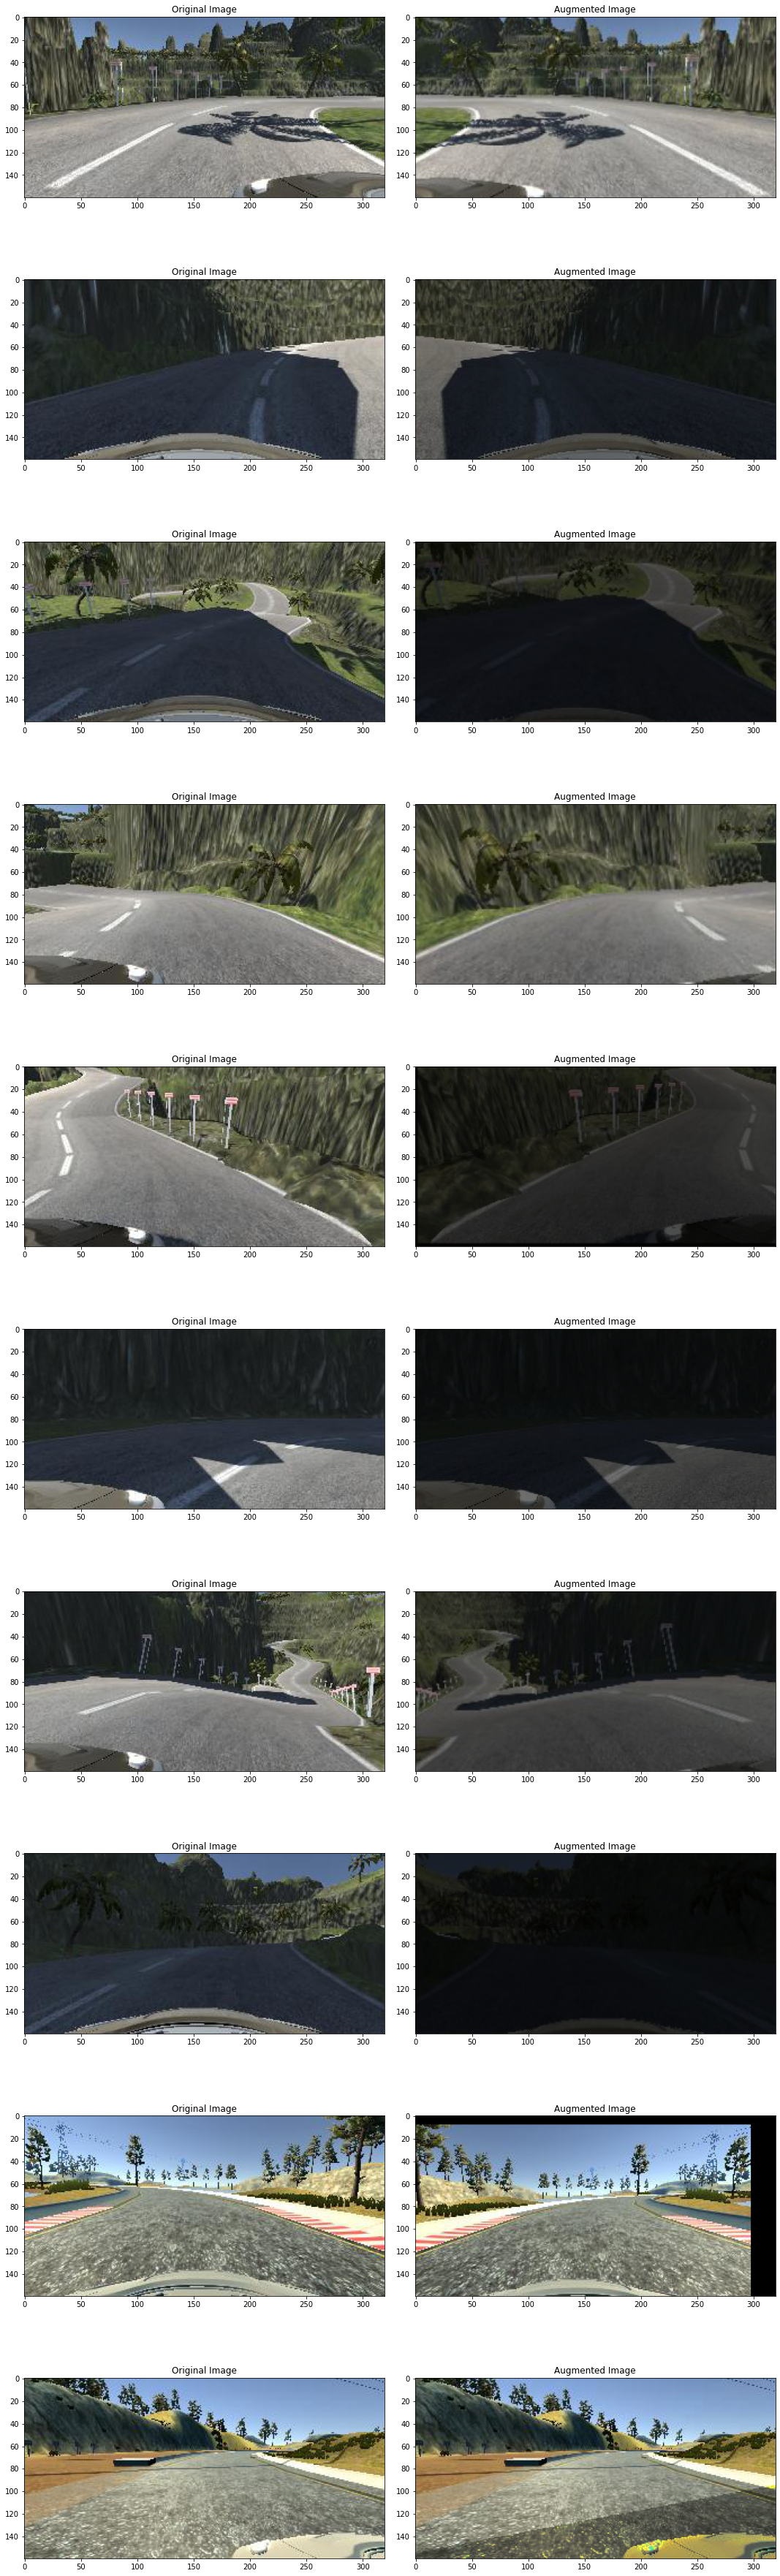

In [31]:
ncol = 2
nrow = 10
 
fig, axs = plt.subplots(nrow, ncol, figsize=(15, 50))
fig.tight_layout()
 
for i in range(10):
  randnum = random.randint(0, len(image_paths) - 1)
  random_image = image_paths[randnum]
  random_steering = steerings[randnum]
    
  original_image = mpimg.imread(random_image)
  augmented_image, steering = random_augment(random_image, random_steering)
    
  axs[i][0].imshow(original_image)
  axs[i][0].set_title("Original Image")
  
  axs[i][1].imshow(augmented_image)
  axs[i][1].set_title("Augmented Image")

In [32]:
def img_preprocess(img):
    img = img[60:135,:,:]
    img = cv2.cvtColor(img, cv2.COLOR_RGB2YUV)
    img = cv2.GaussianBlur(img,  (3, 3), 0)

    img = cv2.resize(img, (200, 66))

    img = img/255
    return img

Text(0.5, 1.0, 'Preprocessed Image')

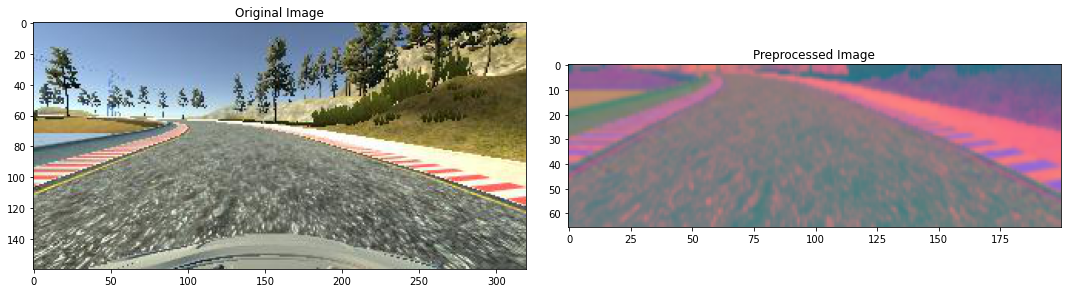

In [33]:
image = image_paths[1221]
original_image = mpimg.imread(image)
preprocessed_image = img_preprocess(original_image)
 
fig, axs = plt.subplots(1, 2, figsize=(15, 10))
fig.tight_layout()
axs[0].imshow(original_image)
axs[0].set_title('Original Image')
axs[1].imshow(preprocessed_image)
axs[1].set_title('Preprocessed Image')

In [34]:
def batch_generator(image_paths, steering_ang, batch_size, istraining):
  
  while True:
    batch_img = []
    batch_steering = []
    
    for i in range(batch_size):
      random_index = random.randint(0, len(image_paths) - 1)
      
      if istraining:
        im, steering = random_augment(image_paths[random_index], steering_ang[random_index])
     
      else:
        im = mpimg.imread(image_paths[random_index])
        steering = steering_ang[random_index]
      
      im = img_preprocess(im)
      batch_img.append(im)
      batch_steering.append(steering)
    yield (np.asarray(batch_img), np.asarray(batch_steering))  

Text(0.5, 1.0, 'Validation Image 0.0')

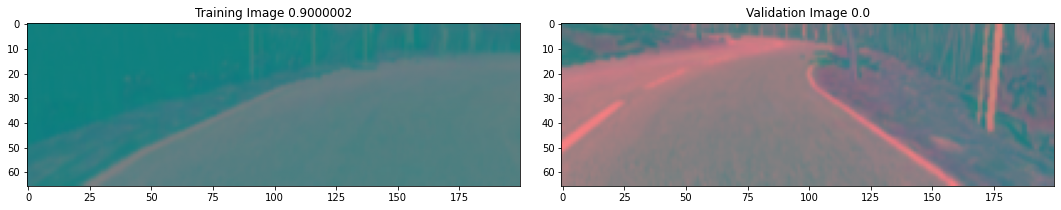

In [35]:
x_train_gen, y_train_gen = next(batch_generator(X_train, y_train, 1, 1))
x_valid_gen, y_valid_gen = next(batch_generator(X_valid, y_valid, 1, 0))
 
fig, axs = plt.subplots(1, 2, figsize=(15, 10))
fig.tight_layout()
 
axs[0].imshow(x_train_gen[0])
axs[0].set_title('Training Image {}'.format(y_train_gen[0]))
 
axs[1].imshow(x_valid_gen[0])
axs[1].set_title('Validation Image {}'.format(y_valid_gen[0]))

In [36]:
def nvidia_model():
  model = Sequential()
  model.add(Conv2D(24, 5, 2, input_shape=(66, 200, 3), activation='elu'))
  model.add(Conv2D(36, 5, 2, activation='elu'))
  model.add(Conv2D(48, 5, 2, activation='elu'))
  model.add(Conv2D(64, 3, activation='elu'))
  
  model.add(Conv2D(64, 3, activation='elu'))
#   model.add(Dropout(0.5))
  
  
  model.add(Flatten())
  
  model.add(Dense(100, activation = 'elu'))
#   model.add(Dropout(0.5))
  
  model.add(Dense(50, activation = 'elu'))
#   model.add(Dropout(0.5))
  
  model.add(Dense(10, activation = 'elu'))
#   model.add(Dropout(0.5))
 
  model.add(Dense(1))
  
  optimizer = Adam(lr=1e-3)
  model.compile(loss='mse', optimizer=optimizer)
  return model

In [37]:
model = nvidia_model()
print(model.summary())

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 31, 98, 24)        1824      
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 14, 47, 36)        21636     
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 5, 22, 48)         43248     
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 3, 20, 64)         27712     
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 1, 18, 64)         36928     
_________________________________________________________________
flatten (Flatten)            (None, 1152)              0         
_________________________________________________________________
dense (Dense)                (None, 100)               1

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/optimizer_v2/optimizer_v2.py:375: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


In [38]:
batch_size = 100
history = model.fit(batch_generator(X_train, y_train, batch_size, 1),
                    validation_data=batch_generator(X_valid, y_valid, batch_size, 0),
                    epochs=25,
                    steps_per_epoch=len(X_train)*5/batch_size, 
                    validation_steps=len(X_valid)*3/batch_size,

                    callbacks=[
                        tf.keras.callbacks.EarlyStopping(
                        monitor='val_loss',
                        patience=5,
                        restore_best_weights=True
                        )
                    ])


Epoch 1/25
759/759 [==============================] - 509s 648ms/step - loss: 0.2696 - val_loss: 0.1770
Epoch 2/25
759/759 [==============================] - 490s 646ms/step - loss: 0.1649 - val_loss: 0.1321
Epoch 3/25
759/759 [==============================] - 489s 645ms/step - loss: 0.1517 - val_loss: 0.1130
Epoch 4/25
759/759 [==============================] - 488s 642ms/step - loss: 0.1421 - val_loss: 0.1124
Epoch 5/25
759/759 [==============================] - 487s 642ms/step - loss: 0.1342 - val_loss: 0.1039
Epoch 6/25
759/759 [==============================] - 485s 639ms/step - loss: 0.1310 - val_loss: 0.1093
Epoch 7/25
759/759 [==============================] - 487s 641ms/step - loss: 0.1249 - val_loss: 0.1027
Epoch 8/25
759/759 [==============================] - 488s 643ms/step - loss: 0.1208 - val_loss: 0.1010
Epoch 9/25
759/759 [==============================] - 488s 642ms/step - loss: 0.1166 - val_loss: 0.1019
Epoch 10/25
759/759 [==============================] - 488s 643m

Text(0.5, 0, 'Epoch')

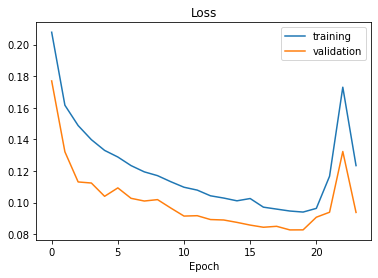

In [39]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['training', 'validation'])
plt.title('Loss')
plt.xlabel('Epoch')


In [40]:
model.save('model.h5')


In [41]:
model.save('model.h5')
from google.colab import files
files.download('model.h5')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>